In [191]:
!pip install scikit-fuzzy
#https://pythonhosted.org/scikit-fuzzy/overview.html

import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [192]:
# New Antecedent/Consequent objects hold universe variables and membership
# functions
temperaturaMedia = ctrl.Antecedent(np.arange(0, 101, 1), 'temperaturaMedia')
temperaturaMedia['alta'] = fuzz.trimf(temperaturaMedia.universe, [25, 100, 100])
temperaturaMedia['baixa'] = fuzz.trimf(temperaturaMedia.universe, [0, 0, 75])

umidadeMedia = ctrl.Antecedent(np.arange(0, 101, 1), 'umidadeMedia')
umidadeMedia['alta'] = fuzz.trimf(umidadeMedia.universe, [0, 100, 100])
umidadeMedia['baixa'] = fuzz.trimf(umidadeMedia.universe, [0, 0, 100])

proximidadeAgua = ctrl.Antecedent(np.arange(0, 41, 1), 'proximidadeAgua')
proximidadeAgua['perto'] = fuzz.trimf(proximidadeAgua.universe, [0, 10, 40])
proximidadeAgua['longe'] = fuzz.trimf(proximidadeAgua.universe, [0, 10, 10])

industrializacao = ctrl.Antecedent(np.arange(0, 21, 1), 'industrializacao')
industrializacao['alta'] = fuzz.trimf(industrializacao.universe, [0, 10, 20])
industrializacao['baixa'] = fuzz.trimf(industrializacao.universe, [0, 10, 10])

doseQuinino = ctrl.Consequent(np.arange(0, 101, 1), 'doseQuinino')
doseQuinino['alta'] = fuzz.trimf(doseQuinino.universe, [40, 100, 100])
doseQuinino['baixa'] = fuzz.trimf(doseQuinino.universe, [0, 0, 50])
doseQuinino['muitoBaixa'] = fuzz.trimf(doseQuinino.universe, [0, 0, 10])


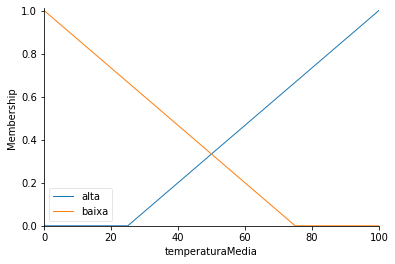

In [193]:
temperaturaMedia.view()

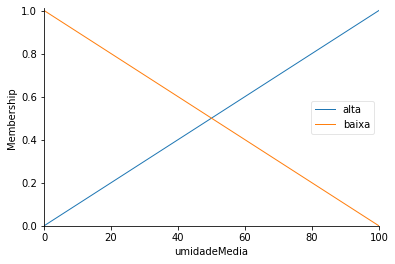

In [194]:
umidadeMedia.view()


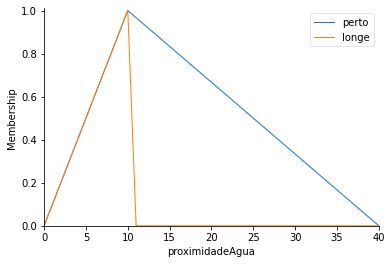

In [195]:
proximidadeAgua.view()


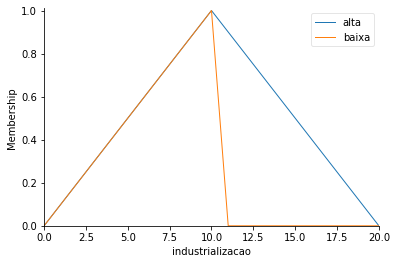

In [196]:
industrializacao.view()

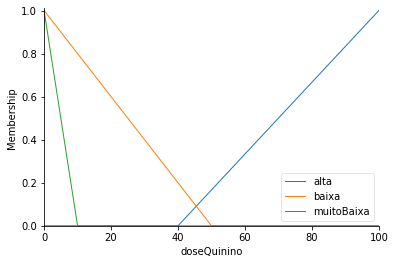

In [197]:
doseQuinino.view()

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f52b8f8bf90>)

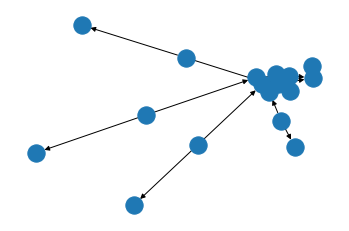

In [198]:
regra01 = ctrl.Rule(temperaturaMedia['alta'] & umidadeMedia['alta'] & proximidadeAgua['perto'] & industrializacao['baixa'], doseQuinino['alta'])
regra02 = ctrl.Rule(industrializacao['alta'], doseQuinino['baixa'])
regra03 = ctrl.Rule(umidadeMedia['alta'] & temperaturaMedia['alta'] & industrializacao['baixa'] | proximidadeAgua['perto'], doseQuinino['alta'])
regra04 = ctrl.Rule(temperaturaMedia['baixa'] & umidadeMedia['baixa'], doseQuinino['muitoBaixa'])

regra01.view()

In [199]:
aplicarDose_ctrl = ctrl.ControlSystem([regra01, regra02, regra03, regra04])

In [200]:
ctrl.accumulation_max
fuzzyMalaria = ctrl.ControlSystemSimulation(aplicarDose_ctrl)

In [201]:
# Pass inputs to the ControlSystem using Antecedent labels with Pythonic API
# Note: if you like passing many inputs all at once, use .inputs(dict_of_data)
fuzzyMalaria.input['temperaturaMedia'] = 80
fuzzyMalaria.input['umidadeMedia'] = 60
fuzzyMalaria.input['proximidadeAgua'] = 20
fuzzyMalaria.input['industrializacao'] = 10

# Crunch the numbers
fuzzyMalaria.compute()

48.524026467078905


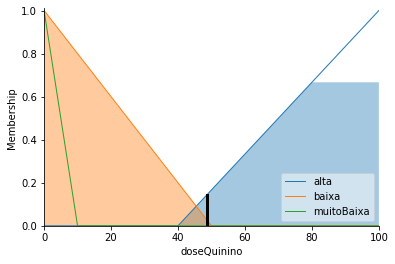

In [202]:
print(fuzzyMalaria.output['doseQuinino'])
doseQuinino.view(sim=fuzzyMalaria)

In [203]:
#x = np.arange(3)
#fuzz.defuzz(x, doseQuinino, 'centroid')